In [463]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

In [464]:
df = pd.read_csv('dataset.csv')

In [465]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


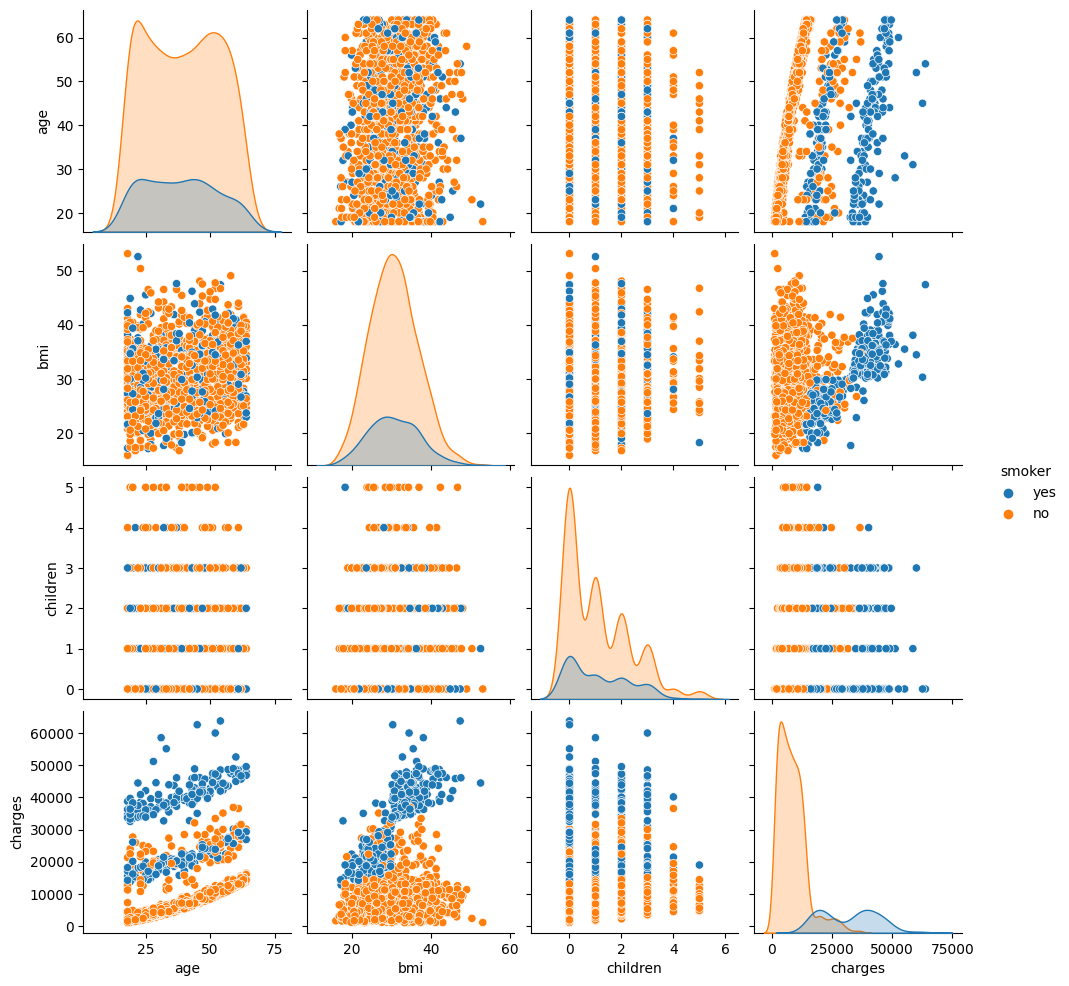

In [467]:
sns.pairplot(data=df, hue='smoker')
plt.show()

In [468]:
# Mod

## Modélisation

In [469]:
df.drop_duplicates(inplace=True)

In [470]:
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, test_size=0.2, random_state=42)
dummy = DummyRegressor()
X_train.head()
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

-0.008391982350864469

In [471]:
onehot = OneHotEncoder(drop="if_binary")
std = StandardScaler()
onehot_col_std = make_column_transformer((onehot, ['sex', 'region', 'smoker']), (std, ['age', 'bmi', 'children']))
onehot_col = make_column_transformer((onehot, ['sex', 'region', 'smoker']),remainder='passthrough')

In [472]:
preprocessing = make_pipeline(onehot_col)
preprocessing_poly = make_pipeline(onehot_col, PolynomialFeatures())
preprocessing_poly_std = make_pipeline(onehot_col_std, PolynomialFeatures())

In [473]:
lr = LinearRegression()
lr_pipe = make_pipeline(preprocessing_poly, lr)
lr_pipe_std = make_pipeline(preprocessing_poly_std, lr)
lr_pipe_std.fit(X_train, y_train)
lr_pipe_std.score(X_test,y_test)


0.8832415554893674

In [474]:
lr_pipe.fit(X_train, y_train)
lr_pipe.score(X_test,y_test)

0.8799058154204994

In [475]:
lr_pipe.score(X_train,y_train)

0.8323330232955449

In [476]:
lr_pipe_poly = make_pipeline(preprocessing_poly, lr)
lr_pipe_poly.fit(X_train, y_train)
lr_pipe_poly.score(X_test,y_test)

0.8799058154204994

In [477]:
el = ElasticNet(random_state=42, tol=0.0001, max_iter=10000)
el_pipe_poly = make_pipeline(preprocessing_poly, el)
el_pipe_poly.fit(X_train, y_train)
el_pipe_poly.score(X_test,y_test)

0.8741432552219175

In [478]:
alpha_range = np.linspace(0.1, 100, 500)
l1_ratio_range = np.linspace(0, 1, 500)

In [479]:
param_distributions = {'elasticnet__alpha': alpha_range, 'elasticnet__l1_ratio':[1], 'pipeline__polynomialfeatures__degree': [1,2,3]}
elastic_grid = RandomizedSearchCV(el_pipe_poly, param_distributions, n_iter=50, cv=5, random_state=42, verbose=0)

In [480]:
# el_pipe_poly.get_params()

In [481]:
elastic_grid.fit(X_train, y_train)

/opt/miniconda3/envs/ml_api/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.310e+09, tolerance: 1.138e+07
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/ml_api/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.398e+09, tolerance: 1.168e+07
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/ml_api/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pipeline',
                                              Pipeline(steps=[('columntransformer',
                                                               ColumnTransformer(remainder='passthrough',
                                                                                 transformers=[('onehotencoder',
                                                                                                OneHotEncoder(drop='if_binary'),
                                                                                                ['sex',
                                                                                                 'region',
                                                                                                 'smoker'])])),
                                                              ('polynomialfeatures',
                                                               PolynomialFeatures())])),
                                             ('elasticnet',
                                              ElasticNet(max_iter=10000,
                                                         random_state=42))]),
                   n_iter=50...
        95.39539078,  95.59559118,  95.79579158,  95.99599198,
        96.19619238,  96.39639279,  96.59659319,  96.79679359,
        96.99699399,  97.19719439,  97.39739479,  97.59759519,
        97.79779559,  97.99799599,  98.19819639,  98.39839679,
        98.59859719,  98.7987976 ,  98.998998  ,  99.1991984 ,
        99.3993988 ,  99.5995992 ,  99.7997996 , 100.        ]),
                                        'elasticnet__l1_ratio': [1],
                                        'pipeline__polynomialfeatures__degree': [1,
                                                                                 2,
                                                                                 3]},
                   random_state=42)

In [482]:
elastic_grid.best_score_

0.8238687452173853

In [483]:
elastic_grid.best_params_

{'pipeline__polynomialfeatures__degree': 2,
 'elasticnet__l1_ratio': 1,
 'elasticnet__alpha': 17.31723446893788}

In [484]:
elastic_grid.score(X_test, y_test)

0.8839190046919357

In [485]:
alpha_range = np.linspace(40,60,1)

param_distributions = {'elasticnet__alpha': alpha_range, 'elasticnet__l1_ratio':[1], 'pipeline__polynomialfeatures__degree': [2]}
elastic_grid_opti = GridSearchCV(el_pipe_poly, param_distributions, cv=5, verbose=0)

In [486]:
elastic_grid_opti.fit(X_train, y_train)
elastic_grid_opti.best_score_

0.8224708419353565

In [487]:
elastic_grid_opti.score(X_test, y_test)

0.8836641592563308